In [5]:
# read the sheet names from openpyxl import load_workbook
from openpyxl import load_workbook
def get_sheet_names(file_path):
    workbook = load_workbook(filename=file_path, read_only=True)
    return workbook.sheetnames
file_path = 'malaria.xlsx'
sheet_names = get_sheet_names(file_path)
print("Sheet names in the workbook:" + str(sheet_names))
# Output the sheet names

Sheet names in the workbook:['Bageshwar', 'almora', 'Chamoli', 'Champawat', 'Dehradun', 'Garhwal ', 'Hardwar', 'Nainital', 'Pithoragarh', 'Rudraprayag', 'Tehri Garhwal', 'Udham Singh Nagar', 'Uttarkashi']


In [50]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Specify the file and sheet to work with
file_path = 'malaria.xlsx'  # Make sure this file is in your current directory

df_new = pd.DataFrame()

for i in range(len(sheet_names)):
    print(f"Sheet {i}: {sheet_names[i]}")
    sheet_name = sheet_names[i]  # Use the first sheet name from the list

    print(f"Reading data from sheet: {sheet_name}")
    # Read Excel using openpyxl engine
    df_raw = pd.read_excel(file_path, sheet_name=sheet_name, header=None, engine='openpyxl')
    
    # get the years from the first row
    years = df_raw.iloc[0, 1:].tolist()

    # print("Years extracted from the first row:", years)

    df_raw 
    
    # invert the table
    df = df_raw.T

    # make the first row as the header
    df.columns = df.iloc[0]
    df = df[1:]
    # reset the index
    df.reset_index(drop=True, inplace=True)

    # rename the columns
    df.columns = ['Year', 'Month'] + list(df.columns[2:])
    # Display the first few rows of the DataFrame

    # copy the years to the first column for the months Jan to Dec
    df['Year'] = df['Year'].ffill()
    print("DataFrame after processing: \n")

    # fill nan with 0
    df.fillna(-1, inplace=True)
    # df.fillna(-1, inplace=True)
    df = df.infer_objects(copy=False)   
    
    df['District'] = sheet_name  # Add the sheet name as a new column

    df_new = pd.concat([df_new, df], ignore_index=True)

print("Final DataFrame after processing all sheets:")

Sheet 0: Bageshwar
Reading data from sheet: Bageshwar
DataFrame after processing: 

Sheet 1: almora
Reading data from sheet: almora
DataFrame after processing: 

Sheet 2: Chamoli
Reading data from sheet: Chamoli
DataFrame after processing: 

Sheet 3: Champawat
Reading data from sheet: Champawat
DataFrame after processing: 

Sheet 4: Dehradun
Reading data from sheet: Dehradun
DataFrame after processing: 

Sheet 5: Garhwal 
Reading data from sheet: Garhwal 
DataFrame after processing: 

Sheet 6: Hardwar
Reading data from sheet: Hardwar
DataFrame after processing: 

Sheet 7: Nainital
Reading data from sheet: Nainital
DataFrame after processing: 

Sheet 8: Pithoragarh
Reading data from sheet: Pithoragarh
DataFrame after processing: 

Sheet 9: Rudraprayag
Reading data from sheet: Rudraprayag
DataFrame after processing: 

Sheet 10: Tehri Garhwal
Reading data from sheet: Tehri Garhwal
DataFrame after processing: 

Sheet 11: Udham Singh Nagar
Reading data from sheet: Udham Singh Nagar
DataFram

In [51]:
df_new

,Year,Month,Total Blood Smears Examined for Malaria,Malaria (Microscopy Tests ) - Plasmodium Vivax test positive,Malaria (Microscopy Tests ) - Plasmodium Falciparum test positive,Inpatient - Malaria,Inpatient - Dengue,Inpatient - Typhoid,"Inpatient - Asthma, Chronic Obstructive Pulmonary Disease (COPD), Respiratory infections",Inpatient - Tuberculosis,Inpatient - Diarrhea with dehydration,Inpatient - Hepatitis,District
0,2019 - 20,jan,206,0,0,0,0,3,40,0,19,0,Bageshwar
1,2019 - 20,feb,297,0,0,0,0,1,56,0,6,0,Bageshwar
2,2019 - 20,march,233,0,0,-1,-1,2,34,2,9,-1,Bageshwar
3,2019 - 20,april,172,0,0,0,0,3,29,1,36,0,Bageshwar
4,2019 - 20,may,337,0,0,0,0,2,41,2,28,3,Bageshwar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2010-11,august,458,-1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
1556,2010-11,september,670,1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
1557,2010-11,octuber,326,2,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
1558,2010-11,nov,395,-1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi


In [75]:
df_new_ = df_new.copy()
# from year reomove last three characters
df_new_['Year'] = df_new_['Year'].str[:4]

# change the value in month 'octuber' to 'october'
df_new_['Month'] = df_new_['Month'].replace('octuber', 'october')

# change the value in month 'jan' to 'january'
df_new_['Month'] = df_new_['Month'].replace('jan ', 'january')
# change the value in month 'feb' to 'february'
df_new_['Month'] = df_new_['Month'].replace('feb ', 'february')
# change the value in month 'mar' to 'march'
df_new_['Month'] = df_new_['Month'].replace('nov', 'november')
# change the value in month 'apr' to 'april'
df_new_['Month'] = df_new_['Month'].replace('dec', 'december')

# Month and Year columns are now in the correct format
df_new_['Month'] = df_new_['Month'].str.lower()
df_new_['Month'] = df_new_['Month'].str.strip()
df_new_['Year'] = df_new_['Year'].astype(int)


df_new_


,Year,Month,Total Blood Smears Examined for Malaria,Malaria (Microscopy Tests ) - Plasmodium Vivax test positive,Malaria (Microscopy Tests ) - Plasmodium Falciparum test positive,Inpatient - Malaria,Inpatient - Dengue,Inpatient - Typhoid,"Inpatient - Asthma, Chronic Obstructive Pulmonary Disease (COPD), Respiratory infections",Inpatient - Tuberculosis,Inpatient - Diarrhea with dehydration,Inpatient - Hepatitis,District
0,2019,january,206,0,0,0,0,3,40,0,19,0,Bageshwar
1,2019,february,297,0,0,0,0,1,56,0,6,0,Bageshwar
2,2019,march,233,0,0,-1,-1,2,34,2,9,-1,Bageshwar
3,2019,april,172,0,0,0,0,3,29,1,36,0,Bageshwar
4,2019,may,337,0,0,0,0,2,41,2,28,3,Bageshwar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2010,august,458,-1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
1556,2010,september,670,1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
1557,2010,october,326,2,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
1558,2010,november,395,-1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi


In [77]:
df_new_[(df_new_['Year'] == years[0]) & (df_new_['District'] == district)]
subset = df_new_[(df_new_['Year'] == year) & (df_new_['District'] == district)]
# Ensure months are ordered correctly
months_order = [
    'january', 'february', 'march', 'april', 'may', 'june',
    'july', 'august', 'september', 'october', 'november', 'december'
]
subset = subset.set_index('Month').reindex(months_order).reset_index()

# Display the subset DataFrame
print("Subset DataFrame for the specified year and district:")
subset

Subset DataFrame for the specified year and district:


,Month,Year,Total Blood Smears Examined for Malaria,Malaria (Microscopy Tests ) - Plasmodium Vivax test positive,Malaria (Microscopy Tests ) - Plasmodium Falciparum test positive,Inpatient - Malaria,Inpatient - Dengue,Inpatient - Typhoid,"Inpatient - Asthma, Chronic Obstructive Pulmonary Disease (COPD), Respiratory infections",Inpatient - Tuberculosis,Inpatient - Diarrhea with dehydration,Inpatient - Hepatitis,District
0,january,2010,392,-1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
1,february,2010,142,-1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
2,march,2010,127,-1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
3,april,2010,94,-1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
4,may,2010,255,-1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
5,june,2010,274,-1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
6,july,2010,426,-1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
7,august,2010,458,-1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
8,september,2010,670,1,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi
9,october,2010,326,2,-1,-1,-1,-1,-1,-1,-1,-1,Uttarkashi


In [ ]:
import matplotlib.pyplot as plt

# Get unique years
years = df_new_['Year'].unique()

for year in years:
    plt.figure(figsize=(14, 6))
    for district in df_new_[df_new_['Year'] == year]['District'].unique():
        subset = df_new_[(df_new_['Year'] == year) & (df_new_['District'] == district)]
        # Ensure months are ordered correctly
        months_order = [
            'january', 'february', 'march', 'april', 'may', 'june',
            'july', 'august', 'september', 'october', 'november', 'december'
        ]
        subset = subset.set_index('Month').reindex(months_order).reset_index()
        plt.plot(subset['Month'], subset['Total Blood Smears Examined for Malaria'], label=district, 
                    marker='o', linestyle='-', markersize=5, linewidth=2, )
    plt.xlabel('Month')
    plt.ylabel('Total Blood Smears Examined for Malaria')
    plt.title(f'Malaria Blood Smears Examined in {year} by District')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    # make y-axis log scale
    plt.yscale('log')
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'figs/malaria_blood_smears_examined_{year}.png')
    plt.show()

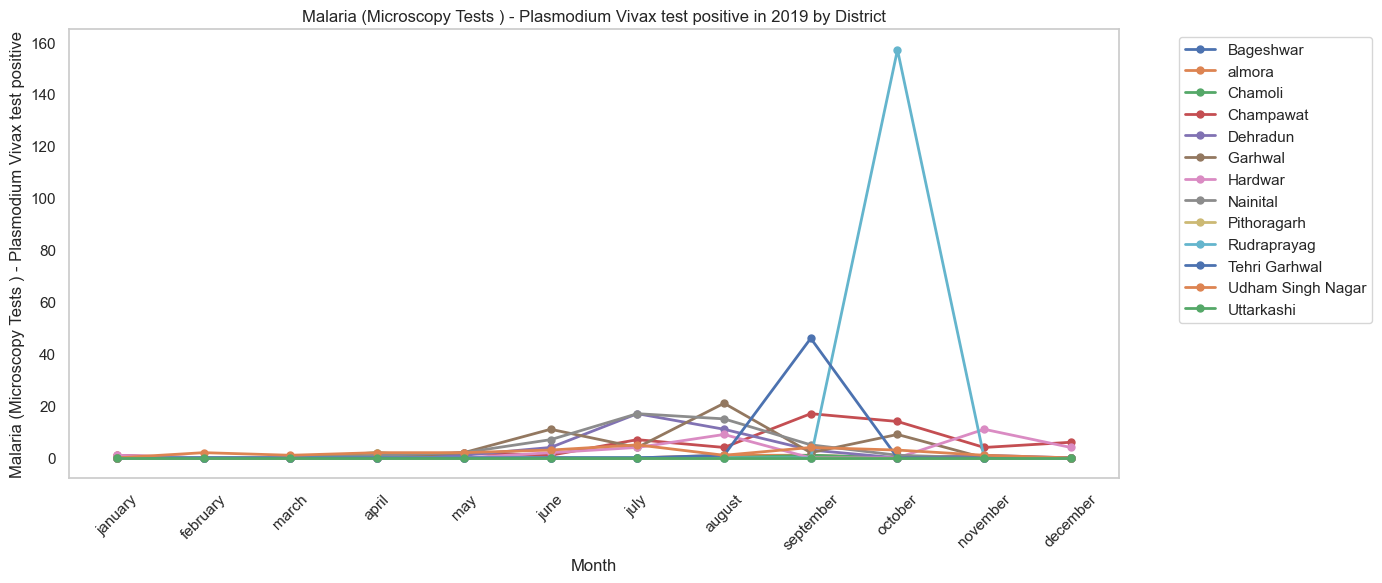

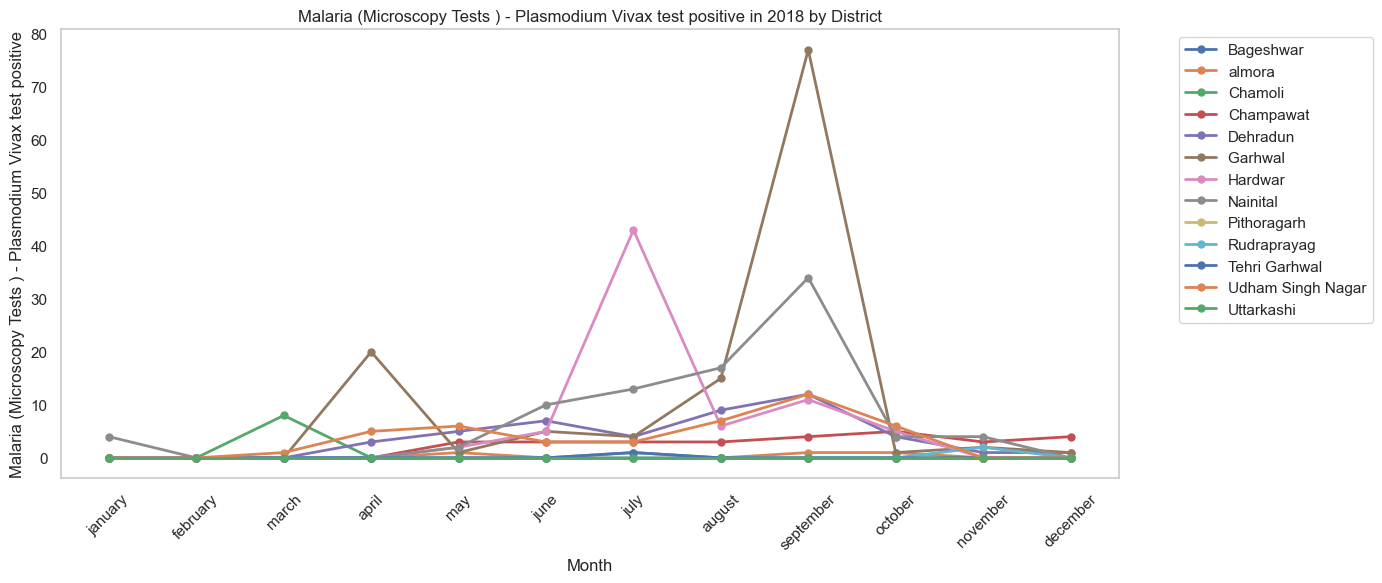

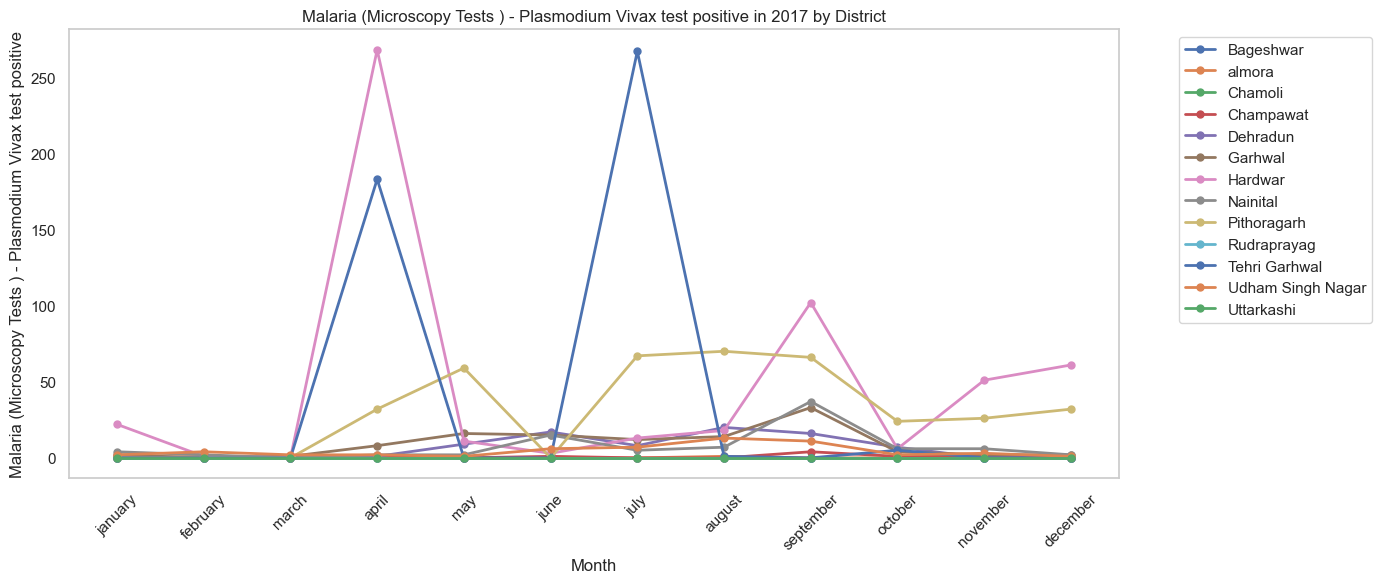

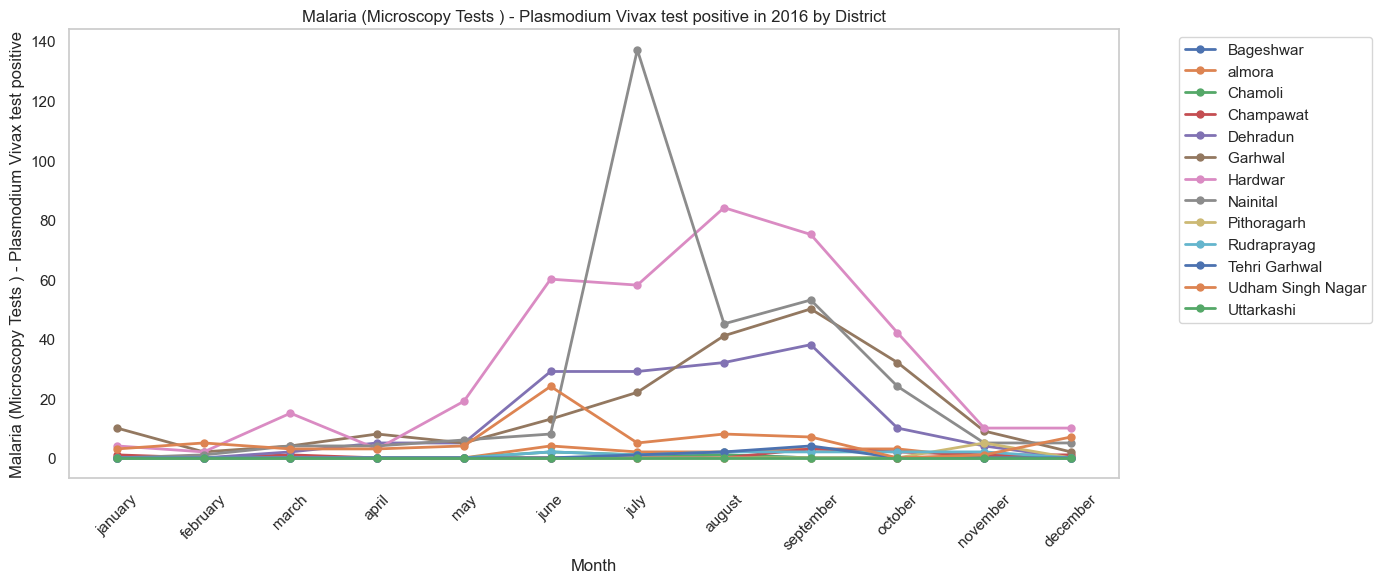

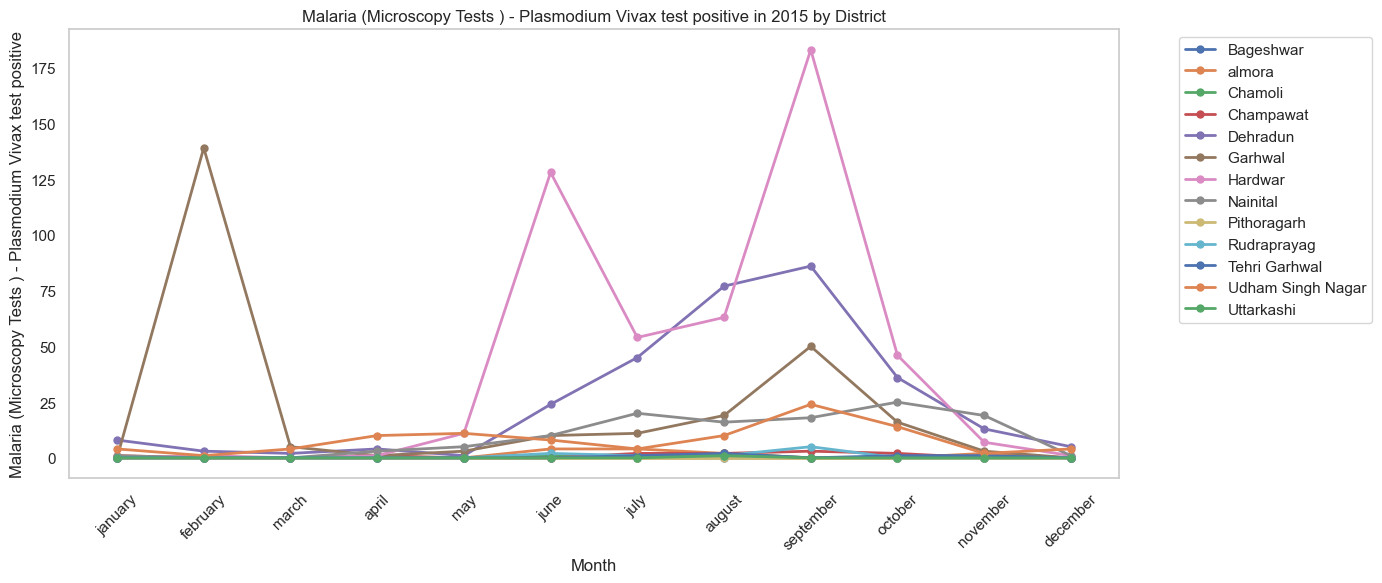

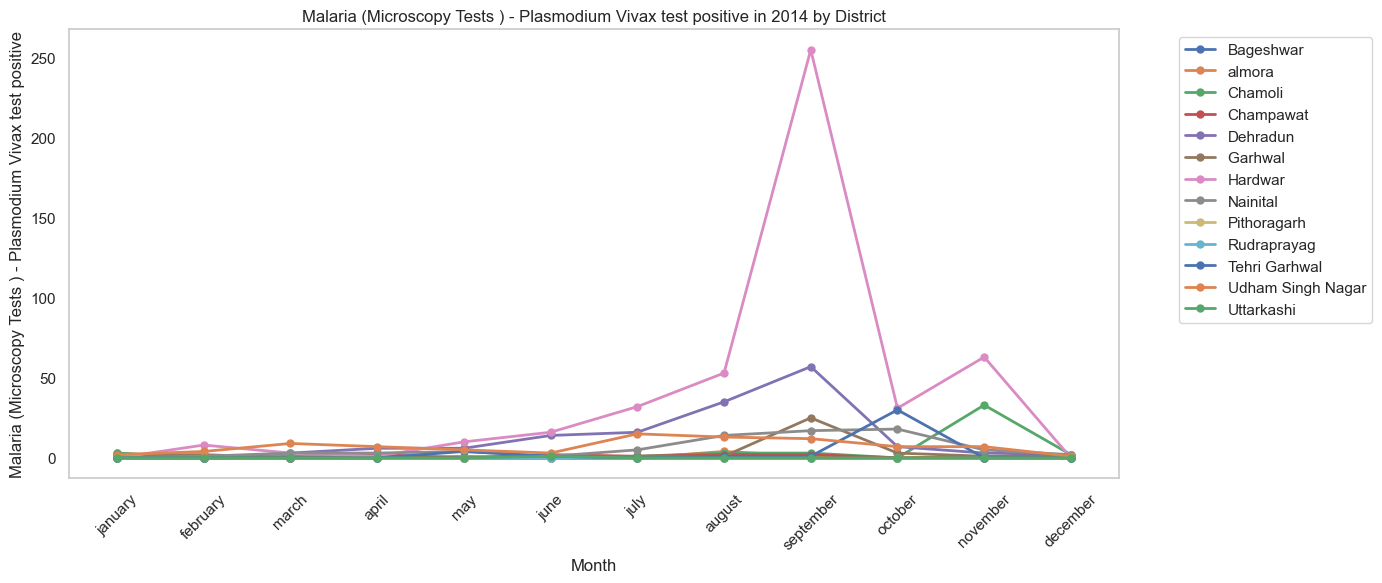

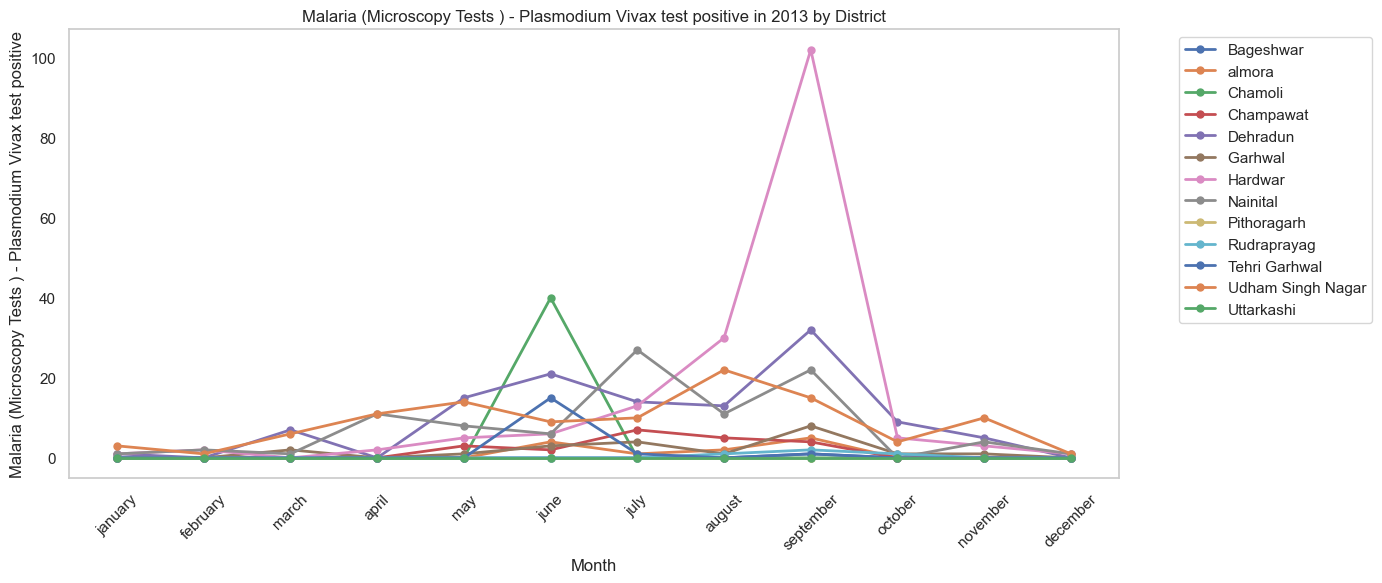

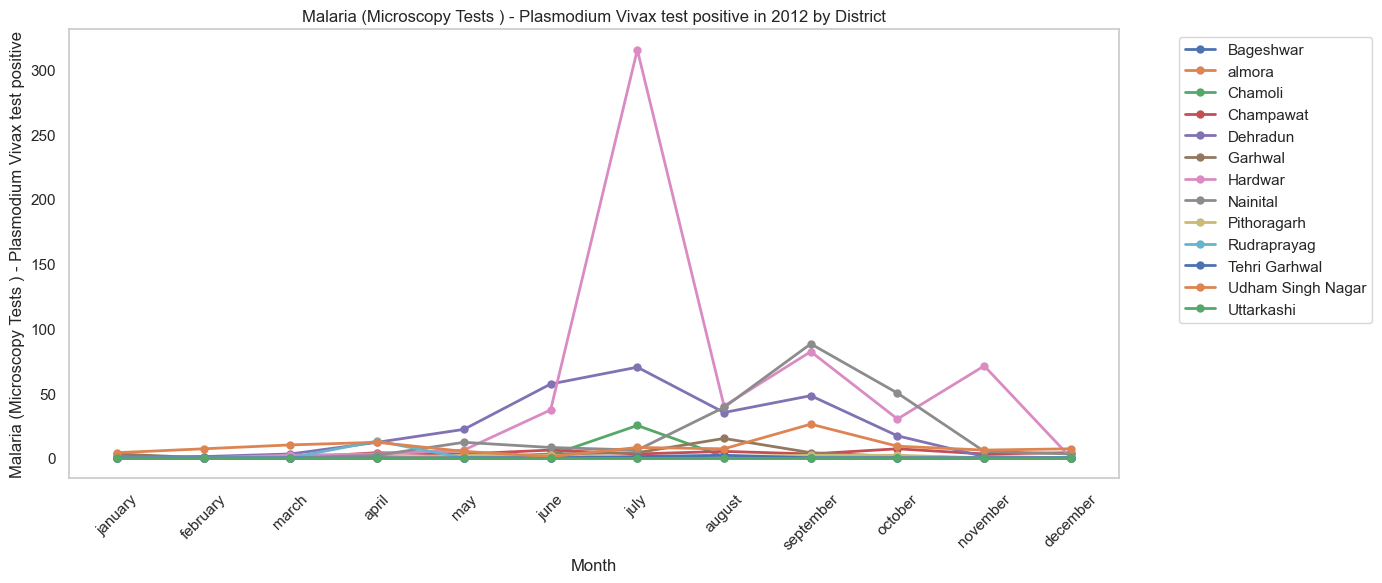

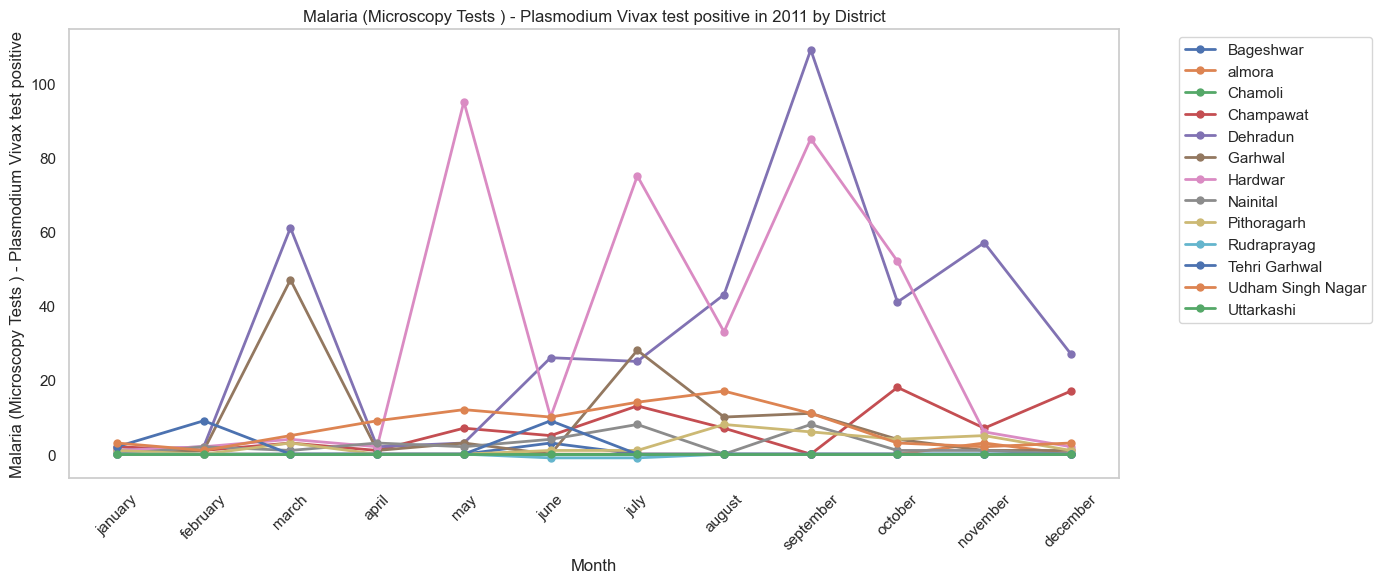

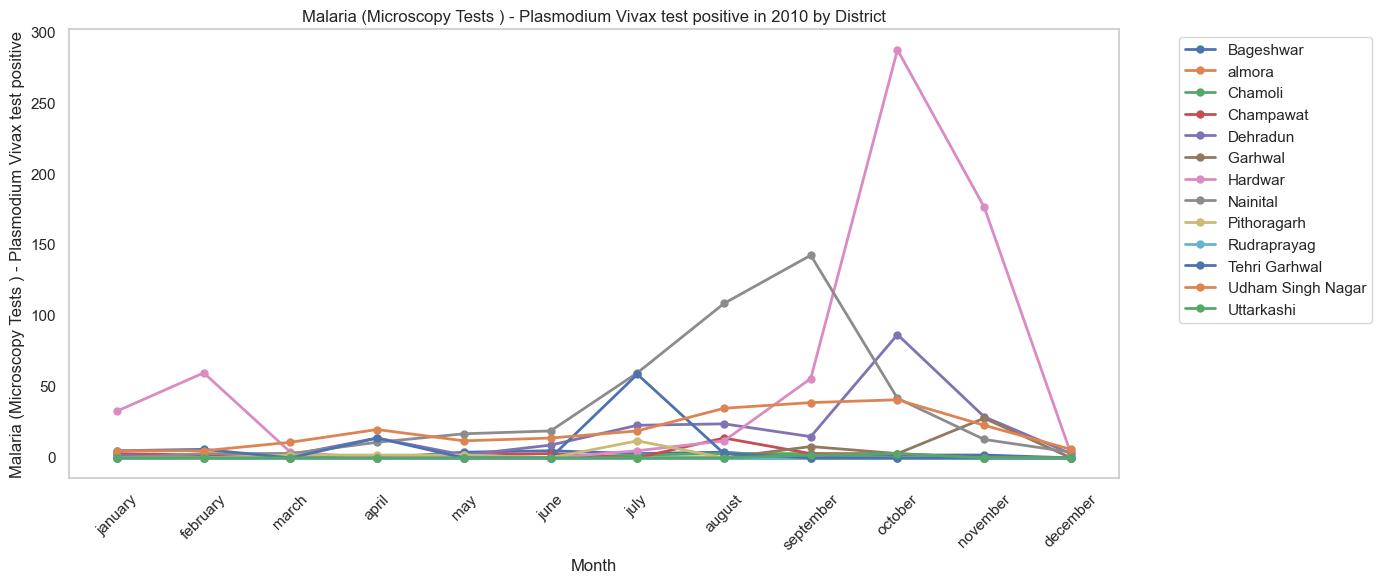

In [83]:
import matplotlib.pyplot as plt

# Get unique years
years = df_new_['Year'].unique()

for year in years:
    plt.figure(figsize=(14, 6))
    for district in df_new_[df_new_['Year'] == year]['District'].unique():
        subset = df_new_[(df_new_['Year'] == year) & (df_new_['District'] == district)]
        # Ensure months are ordered correctly
        months_order = [
            'january', 'february', 'march', 'april', 'may', 'june',
            'july', 'august', 'september', 'october', 'november', 'december'
        ]
        subset = subset.set_index('Month').reindex(months_order).reset_index()
        plt.plot(subset['Month'], subset['Malaria (Microscopy Tests ) - Plasmodium Vivax test positive'], label=district, 
                    marker='o', linestyle='-', markersize=5, linewidth=2, )
    plt.xlabel('Month')
    plt.ylabel('Malaria (Microscopy Tests ) - Plasmodium Vivax test positive')
    plt.title(f'Malaria (Microscopy Tests ) - Plasmodium Vivax test positive in {year} by District')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    # make y-axis log scale
    # plt.yscale('log')
    plt.grid()
    plt.tight_layout()
    # plt.savefig(f'figs/malaria_blood_smears_examined_{year}.png')
    plt.show()

In [ ]:
# get weather data for the districts for the given months and years from internet
import pandas as pd
import numpy as np

# Define the districts and years of interest
districts = df_new_['District'].unique()
years = df_new_['Year'].unique()

# Create a DataFrame to hold the weather data
weather_data = pd.DataFrame()
# Loop through each district and year to fetch weather data
for district in districts:
    for year in years:
        # Fetch weather data from the internet (this is a placeholder, replace with actual fetching logic)
        # For example, you can use an API or web scraping to get the weather data
        # Here we will just create a dummy DataFrame for demonstration purposes
        months = [
            'january', 'february', 'march', 'april', 'may', 'june',
            'july', 'august', 'september', 'october', 'november', 'december'
        ]
        weather_data_temp = pd.DataFrame({
            'District': district,
            'Year': year,
            'Month': months,
            'Temperature': np.random.uniform(20, 35, len(months)),  # Dummy temperature data
            'Rainfall': np.random.uniform(0, 100, len(months))  # Dummy rainfall data
        })
        weather_data = pd.concat([weather_data, weather_data_temp], ignore_index=True)
